Ideias para analise:
- 

In [7]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [22]:
result = pd.read_csv(r"data copy.csv", index_col=0)



In [23]:
result.drop("releaseDate", 1, inplace=True)
result.drop("lastChange", 1, inplace=True)
# result.drop("normalPrice", 1, inplace=True)
# result.to_csv(r"data copy.csv", index=True)

In [24]:
result


,savings,metacriticScore,steamRatingPercent,dealRating
4,90.045023,68,77,9.6
5,90.865144,88,84,9.6
6,85.042521,91,92,9.6
7,85.034014,91,88,9.6
8,90.015003,88,84,9.5
...,...,...,...,...
40527,0.000000,52,35,0.0
40528,0.000000,52,35,0.0
40529,0.000000,52,35,0.0
40530,0.000000,52,35,0.0


In [11]:
# indexes = list()
# for index, row in result.iterrows():
#     if (row["isOnSale"] == 0):
#         indexes.append(index)
# print(len(indexes))
# result.drop(indexes, axis=0, inplace=True)
# result.drop("Unnamed: 0", 1, inplace=True)
# result.to_csv(r"data copy.csv", index=True)

Text(0, 0.5, 'Saving')

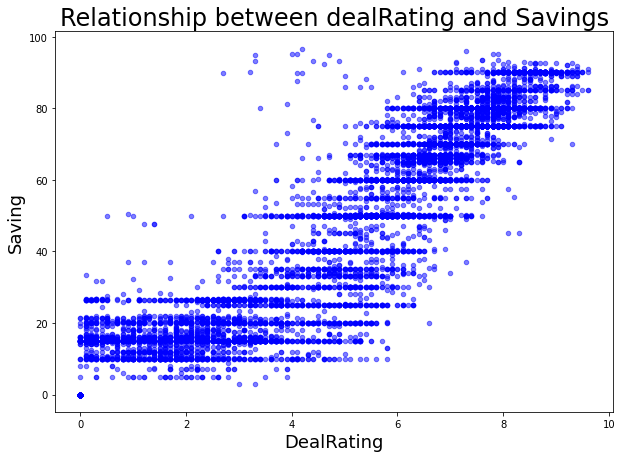

In [25]:
import matplotlib.pyplot as plt

ax1= result.plot(kind='scatter', x='dealRating',y='savings', color='blue',alpha=0.5, figsize=(10,7))


plt.title('Relationship between dealRating and Savings', size=24)
plt.xlabel('DealRating', size=18)
plt.ylabel('Saving', size=18)

In [26]:
# 

X = result.drop('dealRating', axis = 1)   # X  For Train
y = result['dealRating']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20,random_state=0)

In [14]:
# normalização
from sklearn.preprocessing import normalize
y_train
# x_normalized = normalize(X)
# print(x_normalized)

30421    0.0
27470    0.0
30088    0.0
388      8.5
39989    0.0
        ... 
33944    0.0
3369     6.9
26486    0.0
28421    0.0
2765     7.2
Name: dealRating, Length: 12562, dtype: float64

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

model = LinearRegression()
arvore = DecisionTreeRegressor()

model.fit(X_train, y_train) #training the algorithm
arvore.fit(X_train, y_train)
print('Intercept:',model.intercept_)

# For retrieving the slope:
print('Slope:',model.coef_)

Intercept: -1.2729844255292422
Slope: [0.09499484 0.02076103 0.00118814]


In [16]:
y_pred = arvore.predict(X_test)
X_test.head()

,savings,metacriticScore,steamRatingPercent,releaseDate,lastChange
6040,49.979992,86,96,1590019200,1635174681
4366,75.075075,64,53,1049673600,1634939987
8147,40.020010,80,97,1568851200,1635402102
3454,60.040027,78,93,1590624000,1635549877
5837,50.029429,47,56,1616630400,1635147984


In [28]:
# plt.plot(X_test, model.predict(X_test), color='red',linewidth=3)
df_pred = pd.DataFrame({'Index': y_test.index, 'Actual': y_test.ravel(), 'Predicted': y_pred.ravel()})
df_pred

,Index,Actual,Predicted
0,6040,5.8,5.9
1,4366,6.4,6.3
2,8147,5.0,5.0
3,3454,6.9,6.7
4,5837,5.9,6.6
...,...,...,...
3136,23397,1.4,0.0
3137,3500,6.9,6.9
3138,17338,2.9,2.7
3139,18313,2.7,2.8


In [29]:
print(arvore.score(X_test,y_test))


0.9408406406912649


[Text(146.4033128820552, 213.55714285714285, 'X[0] <= 26.782\nmse = 10.31\nsamples = 12562\nvalue = 3.34'),
 Text(76.46294090626772, 205.79142857142858, 'X[0] <= 1.5\nmse = 1.915\nsamples = 7110\nvalue = 0.792'),
 Text(76.40571640360909, 198.0257142857143, 'mse = -0.0\nsamples = 4682\nvalue = 0.0'),
 Text(76.52016540892635, 198.0257142857143, 'X[0] <= 19.051\nmse = 2.061\nsamples = 2428\nvalue = 2.32'),
 Text(52.28862091166086, 190.26, 'X[2] <= 93.5\nmse = 1.689\nsamples = 1542\nvalue = 1.961'),
 Text(29.880600830481722, 182.4942857142857, 'X[2] <= 73.5\nmse = 1.484\nsamples = 1364\nvalue = 1.862'),
 Text(13.56945100329558, 174.72857142857143, 'X[0] <= 15.003\nmse = 1.154\nsamples = 543\nvalue = 1.656'),
 Text(8.09409574872944, 166.96285714285713, 'X[0] <= 14.998\nmse = 0.905\nsamples = 268\nvalue = 1.798'),
 Text(4.693219525906619, 159.19714285714286, 'X[1] <= 60.5\nmse = 0.734\nsamples = 221\nvalue = 1.564'),
 Text(1.083689019097802, 151.43142857142857, 'X[2] <= 55.0\nmse = 0.304\nsa

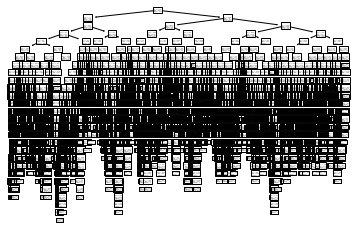

In [30]:
from sklearn import tree

tree.plot_tree(arvore)